# Introduction

In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we’ve never had before about how different people experience romance.

In this capstone, I will analyze some data from OKCupid, an app that focuses on using multiple choice and short answers to match users. The purpose of this project is to practice formulating questions through data exploration and implementing Machine Learning methods to answer those questions.

# Data Exploration

##  Load in the dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('C:/Users/yusha/Downloads/jupternotebook/codecademy/profiles.csv')
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
df.shape

(59946, 31)

In [4]:
df.info()    # most variables are category variable,some variables have missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
age            59946 non-null int64
body_type      54650 non-null object
diet           35551 non-null object
drinks         56961 non-null object
drugs          45866 non-null object
education      53318 non-null object
essay0         54458 non-null object
essay1         52374 non-null object
essay2         50308 non-null object
essay3         48470 non-null object
essay4         49409 non-null object
essay5         49096 non-null object
essay6         46175 non-null object
essay7         47495 non-null object
essay8         40721 non-null object
essay9         47343 non-null object
ethnicity      54266 non-null object
height         59943 non-null float64
income         59946 non-null int64
job            51748 non-null object
last_online    59946 non-null object
location       59946 non-null object
offspring      24385 non-null object
orientation    59946 non-null object
pets

Let's do some statistical summary

In [5]:
df.describe()   
# the value of income looks weired, there are many -1 in the income column, that's because some users they don't want to share this infomation

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [6]:
# let's view some categorical data
df.job.value_counts()

other                                7589
student                              4882
science / tech / engineering         4848
computer / hardware / software       4709
artistic / musical / writer          4439
sales / marketing / biz dev          4391
medicine / health                    3680
education / academia                 3513
executive / management               2373
banking / financial / real estate    2266
entertainment / media                2250
law / legal services                 1381
hospitality / travel                 1364
construction / craftsmanship         1021
clerical / administrative             805
political / government                708
rather not say                        436
transportation                        366
unemployed                            273
retired                               250
military                              204
Name: job, dtype: int64

In [7]:
df.sex.value_counts()

m    35829
f    24117
Name: sex, dtype: int64

In [8]:
df.education.value_counts()

graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
dropped out

In [9]:
df.body_type.value_counts()

average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64

In [10]:
# sample some essay responses
df[["essay0", "essay1", "essay2"]].sample(5)

,essay0,essay1,essay2
27428,i tend to lean towards creative stuff. i like ...,i'm going back to school. it's very exciting! ...,"listening, dancing, designing, being ""the best..."
15446,im from a small town in southern california.,living,reaching my goals
33452,my name is chris. it's really hard to fill the...,just trying to enjoy life and planning on bein...,"everything, except artsy things like drawing/p..."
45258,half original recipe. half crispy. half terrib...,"trying to change the world, one snarky t-shirt...","road trips, writing, designing, armchair psych..."
27765,"i like to laugh loudly and often, to find the ...",i'm working as a cmt and preparing to go back ...,finding humor in the absurd!


In [11]:
df.orientation.value_counts()

straight    51606
gay          5573
bisexual     2767
Name: orientation, dtype: int64

In [12]:
df.status.value_counts()

single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: status, dtype: int64

In [13]:
df.isna().sum()  # check the missing value

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

## Data Visualization

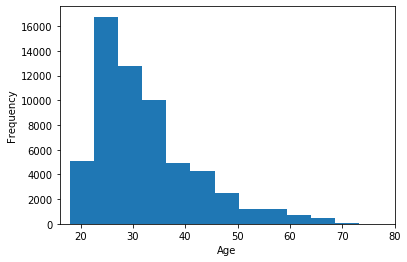

In [22]:
plt.hist(df.age, bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(16, 80)
plt.show()    

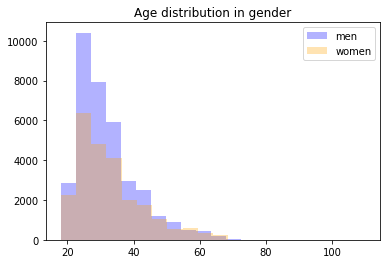

In [28]:
# let's check the gender difference in age. 
age_men = df[df['sex'] == 'm']['age']
age_women = df[df['sex'] == 'f']['age']
plt.figure()
plt.hist(age_men,alpha=0.3,color='blue',bins = 20,label='men')
plt.hist(age_women,alpha=0.3,color='orange',bins = 20,label='women')
plt.legend()
plt.title('Age distribution in gender')
plt.show()      # the distribution of age in gender are almost same 

from this plot, we can see the age is skewed to right, most people are between 20 and 30

  sex orientation  count
0   f    bisexual   1996
1   f         gay   1588
2   f    straight  20533
3   m    bisexual    771
4   m         gay   3985
5   m    straight  31073


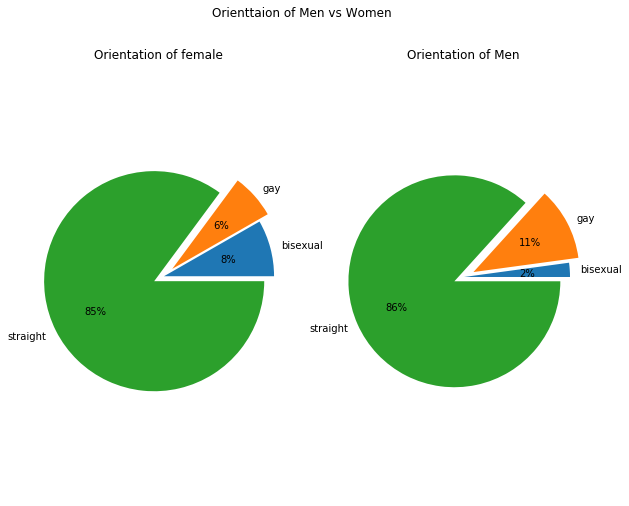

In [40]:
# visualize the sexual orientation differnce by gender
o=df.groupby(['sex','orientation']).age.count().reset_index()
o.rename(columns={'age':'count'},inplace=True)
print(o)
explode = [0,0.1,0.1]
plt.figure(figsize=(10,8))
ax=plt.subplot(1,2,1)
plt.pie(o[o['sex'] == 'f']['count'], labels = o[o['sex'] == 'f']['orientation'], autopct = '%d%%', explode = explode)
plt.axis('equal')
ax.set_title('Orientation of female')
ax1 = plt.subplot(1,2,2)
plt.pie(o[o['sex'] == 'm']['count'], labels = o[o['sex'] == 'm']['orientation'], autopct = '%d%%', explode = explode)
plt.axis('equal')
ax1.set_title('Orientation of Men')
plt.suptitle('Orienttaion of Men vs Women')
plt.show()

85% of female/male labled them as straight, 8% female label them as bisexual than male, of whom only 2% claimed as bisexual.
6% percent female lable them as gay while 11% of men label them as gay


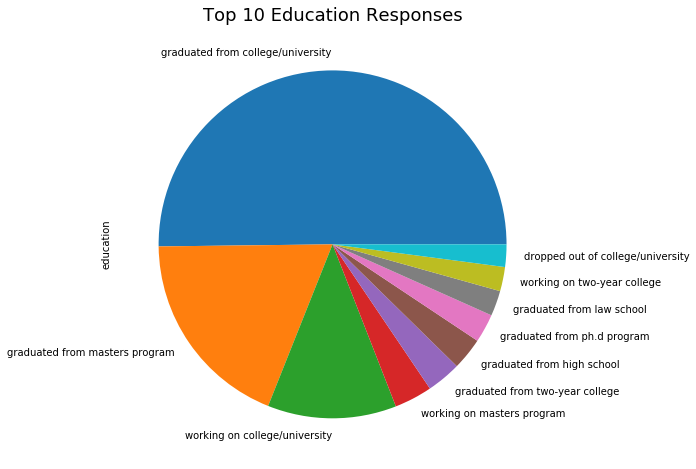

In [17]:
# Top 10 responses in education
df.education.value_counts()[0:10].plot(kind="pie", figsize=(10, 8))
plt.title("Top 10 Education Responses", fontsize=18)
plt.show()    # most of users are from college/university

Essay--A set of open short-answer responses to :
<br> 0: My self summary 
<br> 1: What I'm doing with my life
<br> 2: I'm really good at
<br> 3: The first thing people notice about me
<br> 4: Favorite books, movies, tv, food
<br> 5: The six things I could never do without
<br> 6: I spend a lot of time thinking about
<br> 7: On a typical Friday night I am
<br> 8: The most private thing I am willing to admit
<br> 9: You should message me if

In [4]:
# let's check the length of words in essay
essay_cols = ['essay0', 'essay1', 'essay2', 'essay3', 'essay4',
              'essay5', 'essay6', 'essay7', 'essay8', 'essay9']
for col in essay_cols:
    print( col+": "+ str(df[col].isna().sum()))   # Eassy 8 has most missing values,that's make sense, because most of users may not want share the private thing

essay0: 5488
essay1: 7572
essay2: 9638
essay3: 11476
essay4: 10537
essay5: 10850
essay6: 13771
essay7: 12451
essay8: 19225
essay9: 12603


In [5]:
# Removing the NaNs, symbols, link

# Removing the NaNs
all_essays = df[essay_cols].replace(np.nan, '', regex=True)
# Combining the essays
all_essays = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)

all_essays_clean = all_essays.replace(r'<.*>', '', regex = True)
all_essays_clean = all_essays_clean.replace(r'[-,\.;:\+\(\)/=\?\"<>%&~\|\!\]\[]', '', regex = True)
all_essays_clean = all_essays_clean.replace(r'href|classilink', '', regex = True)
all_essays_clean = all_essays_clean.replace(r'http[\w\d]*', '', regex = True)
all_essays_clean.head()

0    about me\n\ni would love to think that i was s...
1    i am a chef this is what that means\n1 i am a ...
2    i'm not ashamed of much but writing public tex...
3    i work in a library and go to school   reading...
4    hey how's it going currently vague on the prof...
dtype: object

In [6]:
# check word length
all_len_word= all_essays_clean.apply(lambda x: len(x.split()))
df['essay_len']=all_len_word
df['essay_len'].head()

0    450
1    265
2    856
3     67
4    102
Name: essay_len, dtype: int64

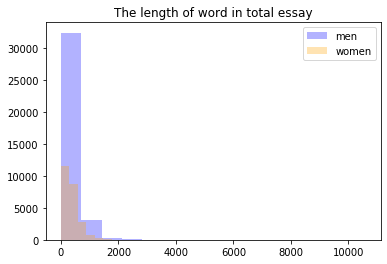

In [7]:
women_essay=df[df['sex'] == 'f']['essay_len'] 
men_essay=df[df['sex'] == 'm']['essay_len']              

plt.figure()
plt.hist(men_essay,alpha=0.3,color='blue',bins =15,label='men')
plt.hist(women_essay,alpha=0.3,color='orange',bins = 15,label='women')
plt.legend()
plt.title('The length of word in total essay')
plt.show()  # looks like the word counts didn't show clear difference in gender

C:\Users\yusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


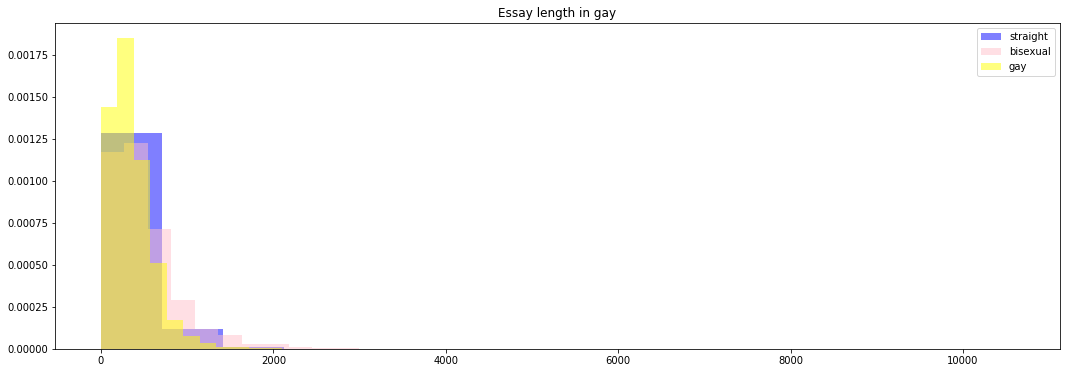

In [91]:
# let's check the length of words in total eassy in different orientation
orie=['straight', 'bisexual', 'gay']
c=['blue','pink','yellow']
plt.figure(figsize=(18,6))
for i in range(-1,2):
   # plt.subplot(1,3,i+2)
    plt.hist(df[df['orientation']==orie[i+1]]['essay_len'],color=c[i+1],bins=15,label=orie[i+1],alpha=0.5,normed=True)
    plt.legend()
    plt.title('Essay length in '+orie[i+1])
plt.show()    # the bisexual wrote more words than other two.

C:\Users\yusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


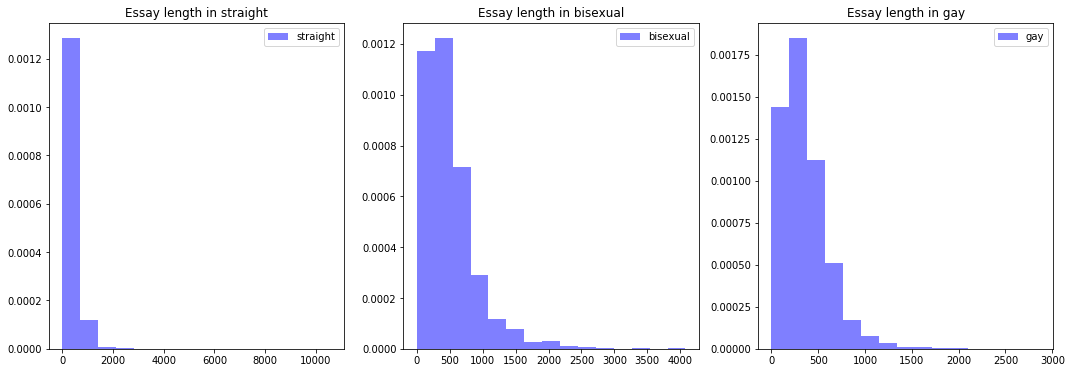

In [93]:
orie=['straight', 'bisexual', 'gay']
plt.figure(figsize=(18,6))
for i in range(-1,2):
    plt.subplot(1,3,i+2)
    plt.hist(df[df['orientation']==orie[i+1]]['essay_len'],color='blue',bins=15,label=orie[i+1],alpha=0.5,normed=True)
    plt.legend()
    plt.title('Essay length in '+orie[i+1])
plt.show()

#  Formulate a question


Q1. Can we predict gender based on following features:
     <br> 1.body_type  2.diet  3. drinks  4.drugs 5.height 6.essay length 7.smokes

Q2. Can we divide the user to differet group based on essay
        

# Data Clean

In [52]:
feature=['body_type','diet','drinks','drugs','height','essay_len','smokes','sex']
df_feature=df[feature]
df_feature.head()

,body_type,diet,drinks,drugs,height,essay_len,smokes,sex
0,a little extra,strictly anything,socially,never,75.0,450,sometimes,m
1,average,mostly other,often,sometimes,70.0,265,no,m
2,thin,anything,socially,NaN,68.0,856,no,m
3,thin,vegetarian,socially,NaN,71.0,67,no,m
4,athletic,NaN,socially,never,66.0,102,no,m


In [53]:
df_feature.isna().sum()

body_type     5296
diet         24395
drinks        2985
drugs        14080
height           3
essay_len        0
smokes        5512
sex              0
dtype: int64

In [54]:
df_feature=df_feature.fillna('unknown')

In [55]:
print(df_feature.body_type.unique())
print(df_feature.diet.unique())
print(df_feature.drinks.unique())
print(df_feature.drugs.unique())
print(df_feature.smokes.unique())

['a little extra' 'average' 'thin' 'athletic' 'fit' 'unknown' 'skinny'
 'curvy' 'full figured' 'jacked' 'rather not say' 'used up' 'overweight']
['strictly anything' 'mostly other' 'anything' 'vegetarian' 'unknown'
 'mostly anything' 'mostly vegetarian' 'strictly vegan'
 'strictly vegetarian' 'mostly vegan' 'strictly other' 'mostly halal'
 'other' 'vegan' 'mostly kosher' 'strictly halal' 'halal'
 'strictly kosher' 'kosher']
['socially' 'often' 'not at all' 'rarely' 'unknown' 'very often'
 'desperately']
['never' 'sometimes' 'unknown' 'often']
['sometimes' 'no' 'unknown' 'when drinking' 'yes' 'trying to quit']


In [56]:
# map sex_code
sex_map = {'m': 0, 'f': 1}
df_feature['sex'] = df_feature['sex'].map(sex_map)

# map body_type
body_map = {'unknown': -1, 'rather not say': -1, 'used up':  0,
            'overweight': 1, 'full figured': 2, 'curvy': 3,
           'a little extra': 4, 'average': 5, 'thin': 6,
           'skinny': 7, 'athletic': 8, 'fit': 9,
           'jacked': 10}
df_feature['body_type'] = df_feature['body_type'].map(body_map)

#map diet type
def map_diet(diet_str):
    if diet_str == 'unknown':
        return -1
    elif 'anything' in diet_str:
        return 0
    elif 'vegetarian' in diet_str:
        return 1
    elif 'vegan' in diet_str:
        return 2
    elif 'kosher' in diet_str:
        return 3
    elif 'halal' in diet_str:
        return 4
    elif 'other' in diet_str:
        return 5

df_feature['diet'] = df_feature['diet'].apply(map_diet)

# drinks_code
drinks_map = {'unknown': -1, 'not at all': 0, 'rarely':  1,
              'socially': 2, 'often': 3, 'very often': 4,
             'desperately': 4}
df_feature['drinks'] = df_feature['drinks'].map(drinks_map)


# map drugs_code
drugs_map = {'unknown': -1, 'never': 0,
             'sometimes':  1, 'often': 2}
df_feature['drugs'] = df_feature['drugs'].map(drugs_map)

#map smokes code
# smokes_code
smokes_map = {'unknown': -1, 'no': 0, 'trying to quit':  1,
              'sometimes': 2, 'when drinking': 3, 'yes': 4}
df_feature['smokes'] = df_feature['smokes'].map(smokes_map)

df_feature.head()

,body_type,diet,drinks,drugs,height,essay_len,smokes,sex
0,4,0,2,0,75,450,2,0
1,5,5,3,1,70,265,0,0
2,6,0,2,-1,68,856,0,0
3,6,1,2,-1,71,67,0,0
4,8,-1,2,0,66,102,0,0


In [57]:
df_new=df_feature[df_feature.height != 'unknown']
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59943 entries, 0 to 59945
Data columns (total 8 columns):
body_type    59943 non-null int64
diet         59943 non-null int64
drinks       59943 non-null int64
drugs        59943 non-null int64
height       59943 non-null object
essay_len    59943 non-null int64
smokes       59943 non-null int64
sex          59943 non-null int64
dtypes: int64(7), object(1)
memory usage: 4.1+ MB


In [63]:
df_new['height']=df_new['height'].astype('float')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59943 entries, 0 to 59945
Data columns (total 8 columns):
body_type    59943 non-null int64
diet         59943 non-null int64
drinks       59943 non-null int64
drugs        59943 non-null int64
height       59943 non-null float64
essay_len    59943 non-null int64
smokes       59943 non-null int64
sex          59943 non-null int64
dtypes: float64(1), int64(7)
memory usage: 6.6 MB


C:\Users\yusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Normalize data and Model Building--Q1

split dataset into training dataset and testing dataset

In [66]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
df_new.reset_index(inplace=True, drop = True)
y = df_new['sex']
X = df_new.drop(columns = ['sex'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)


In [67]:
mm_scaler = MinMaxScaler()
X_train_scaled = mm_scaler.fit_transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

In [70]:
model_list={}

## Logist regression model

In [73]:
%%time
from sklearn.linear_model import LogisticRegression
param_grid = {'C': [0.01,0.05,0.1,1]}
grid = GridSearchCV(LogisticRegression(solver = 'liblinear'), param_grid, cv = 5, scoring = "roc_auc")
grid.fit(X_train_scaled, y_train)
print(grid.best_params_)
logit_model = LogisticRegression(**grid.best_params_)
logit_model.fit(X_train_scaled,y_train)
model_list['logit_model'] = logit_model

{'C': 1}
Wall time: 2.36 s


C:\Users\yusha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [75]:
log_predict=logit_model.predict(X_test_scaled)
print(logit_model.score(X_train_scaled,y_train))
print(logit_model.score(X_test_scaled,y_test))

0.8380739875714226
0.8401868379347736


In [77]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test, log_predict)
print(c)

[[6351  790]
 [1126 3722]]


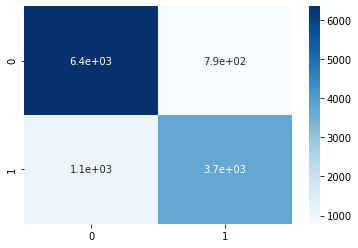

In [83]:
import seaborn as sns
sns.heatmap(c, annot=True, cmap='Blues')

##  Random foreset model

In [74]:
%%time
from sklearn.ensemble import RandomForestClassifier
param_grid = {'max_depth': [2,4,6,8], "n_estimators": [100,200,300,500]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5, scoring = "roc_auc")
grid.fit(X_train_scaled, y_train)
print(grid.best_params_)
rf_model = RandomForestClassifier(**grid.best_params_)
rf_model.fit(X_train_scaled, y_train)
model_list['rf_model'] = rf_model

{'max_depth': 8, 'n_estimators': 200}
Wall time: 4min 5s


In [84]:
rf_predict=rf_model.predict(X_test_scaled)
print(rf_model.score(X_train_scaled,y_train))
print(rf_model.score(X_test_scaled,y_test))   # print out the predict result

0.8591775451474329
0.8571190257736259


[[6368  773]
 [ 940 3908]]


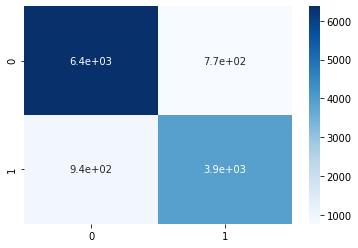

In [85]:
c=confusion_matrix(y_test, rf_predict)
print(c)
sns.heatmap(c, annot=True, cmap='Blues')

## XGBOOST

In [ ]:
from xgboost import XGBClassifier

In [88]:
%%time
param_grid = {"learning_rate": [0.01, 0.1,0.5], "n_estimators": [100,300,500], 'max_depth':[3,4,5]}
grid = GridSearchCV(XGBClassifier(), param_grid, cv = 5, scoring = "roc_auc")
grid.fit(X_train_scaled, y_train)
print("best hyperparameters through grid search: ", grid.best_params_)
xgb_model = XGBClassifier(**grid.best_params_)
xgb_model.fit(X_train_scaled, y_train)
model_list['xgb_model'] = xgb_model

best hyperparameters through grid search:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Wall time: 5min 41s


0.8614714101013471
0.860121778296772
[[6462  679]
 [ 998 3850]]


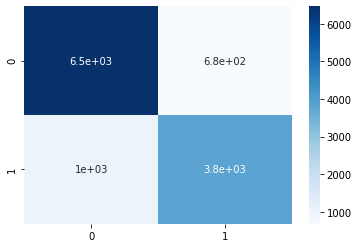

In [89]:
xgb_predict=xgb_model.predict(X_test_scaled)
print(xgb_model.score(X_train_scaled,y_train))
print(xgb_model.score(X_test_scaled,y_test)) 
xgb_conf=confusion_matrix(y_test, xgb_predict)
print(xgb_conf)
sns.heatmap(xgb_conf, annot=True, cmap='Blues')

## Compare ROC of different model

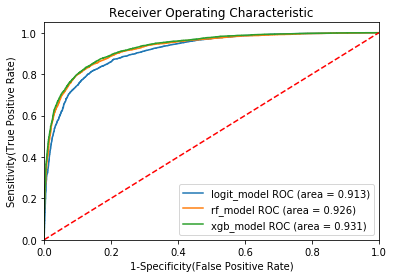

In [91]:
from sklearn import metrics

plt.figure()

# Below for loop iterates through your models list
for name, model in model_list.items():
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_scaled)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict_proba(X_test_scaled)[:,1])
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % (name, auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

Based on the ROC, XGBoost model has the best performance, AUC achieved 93%.

## Feature importance

In [112]:
print(xgb_model.feature_importances_)
print(X.columns)

[0.12923773 0.02861958 0.01285879 0.01189561 0.7929366  0.00998631
 0.0144654 ]
Index(['body_type', 'diet', 'drinks', 'drugs', 'height', 'essay_len',
       'smokes'],
      dtype='object')


<BarContainer object of 7 artists>

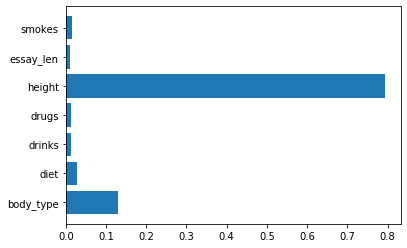

In [111]:
plt.barh(X.columns, xgb_model.feature_importances_)

 From the above plot, Height and body type are important factors to decide gender

# Topic Modeling-Q2

 THE Essay 0 is myself summary, I'm interested in cluttering the data into different groups based on their description

In [113]:
# let's first explore some essay
df['essay0'].head()

0    about me:<br />\n<br />\ni would love to think...
1    i am a chef: this is what that means.<br />\n1...
2    i'm not ashamed of much, but writing public te...
3            i work in a library and go to school. . .
4    hey how's it going? currently vague on the pro...
Name: essay0, dtype: object

In [124]:
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud, STOPWORDS

essay0_words = df['essay0'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x =essay0_words.index.values[2:50],
            y = essay0_words.values[2:50],
            marker= dict(colorscale='Jet',
                         color = essay0_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 (Uncleaned) Word frequencies in the training dataset'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

from the plot we could see there are a lot of words that doesn't add much meaning to a sentence, we could use stopwords to remove them

## Tokenize and remove the stop words

In [180]:
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

In [192]:
WORDS_TO_IGNORE = []

stop = set(stopwords.words('english'))
stop_ignore = stop.union(set(WORDS_TO_IGNORE))
# ps = PorterStemmer()

def tokenize(text):
    """
    sent_tokenize(): segment text into sentences
    word_tokenize(): break sentences into words
    """
    try: 
        regex = re.compile('[' +re.escape(string.punctuation) + '0-9\\r\\t\\n]')
        text = regex.sub(" ", text) # remove punctuation
        
        tokens_ = [word_tokenize(s) for s in sent_tokenize(text)]
        tokens = []
        for token_by_sent in tokens_:
            tokens += token_by_sent
        tokens = list(filter(lambda t: t.lower() not in stop_ignore, tokens))
        filtered_tokens = [w for w in tokens if re.search('[a-zA-Z]', w)]
        filtered_tokens = [w.lower() for w in filtered_tokens if len(w)>=3]
        
        return filtered_tokens
            
    except TypeError as e: print(text,e)

In [194]:
#apply the tokenizer into essay0 columns
df_new['tokens'] = df['essay0'].map(tokenize)
df.reset_index(drop=True, inplace=True)
df_new['essay0']=df['essay0']
df_new.head()

,body_type,diet,drinks,drugs,height,essay_len,smokes,sex,tokens,essay0
0,4,0,2,0,75.0,450,2,0,"[would, love, think, kind, intellectual, eithe...",about me:<br />\n<br />\ni would love to think...
1,5,5,3,1,70.0,265,0,0,"[chef, means, workaholic, love, cook, regardle...",i am a chef: this is what that means.<br />\n1...
2,6,0,2,-1,68.0,856,0,0,"[ashamed, much, writing, public, text, online,...","i'm not ashamed of much, but writing public te..."
3,6,1,2,-1,71.0,67,0,0,"[work, library, school]",i work in a library and go to school. . .
4,8,-1,2,0,66.0,102,0,0,"[hey, going, currently, vague, profile, know, ...",hey how's it going? currently vague on the pro...


In [195]:
df_new[['tokens','essay0']].head()

,tokens,essay0
0,"[would, love, think, kind, intellectual, eithe...",about me:<br />\n<br />\ni would love to think...
1,"[chef, means, workaholic, love, cook, regardle...",i am a chef: this is what that means.<br />\n1...
2,"[ashamed, much, writing, public, text, online,...","i'm not ashamed of much, but writing public te..."
3,"[work, library, school]",i work in a library and go to school. . .
4,"[hey, going, currently, vague, profile, know, ...",hey how's it going? currently vague on the pro...


## visualize common words by gender

In [157]:
df_new.head()

,body_type,diet,drinks,drugs,height,essay_len,smokes,sex,tokens,essay0
0,4,0,2,0,75.0,450,2,0,"[would, love, think, kind, intellectual, eithe...",about me:<br />\n<br />\ni would love to think...
1,5,5,3,1,70.0,265,0,0,"[chef, means, workaholic, love, cook, regardle...",i am a chef: this is what that means.<br />\n1...
2,6,0,2,-1,68.0,856,0,0,"[ashamed, much, writing, public, text, online,...","i'm not ashamed of much, but writing public te..."
3,6,1,2,-1,71.0,67,0,0,"[work, library, school]",i work in a library and go to school. . .
4,8,-1,2,0,66.0,102,0,0,"[hey, going, currently, vague, profile, know, ...",hey how's it going? currently vague on the pro...


In [196]:
f_common=df_new[df_new['sex']==1]['tokens']
m_common=df_new[df_new['sex']==0]['tokens']

In [197]:
comment_words = '' 

In [200]:
# iterate through female token words 
for val in f_common: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1000, height = 800, 
                background_color ='white', 
                stopwords = stop, max_words=1000,scale=6,
                min_font_size = 10).generate(comment_words)

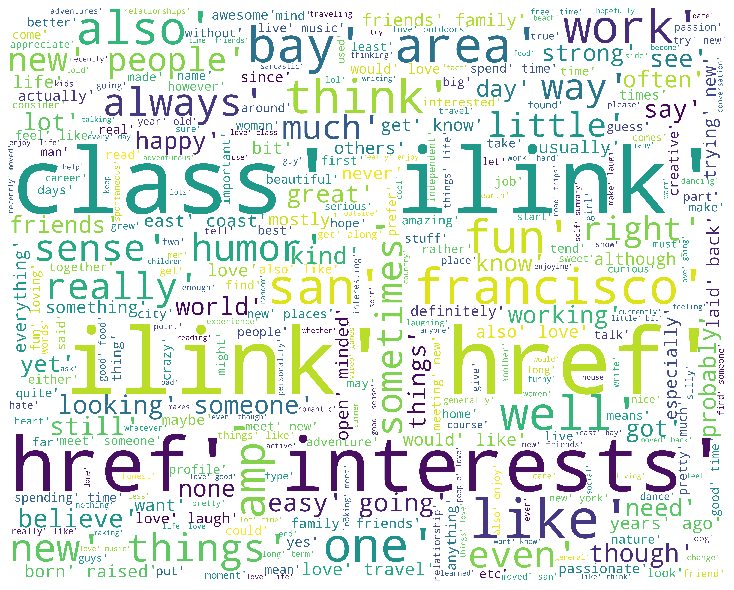

In [201]:
# plot the WordCloud image                        
plt.figure(figsize = (10, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

from the word cloud, it looks like most of female are come from San Franciso, they like to talk about interests in the self-introduction. Besides, they like to use fun,humor and hashtag to describe themselves.

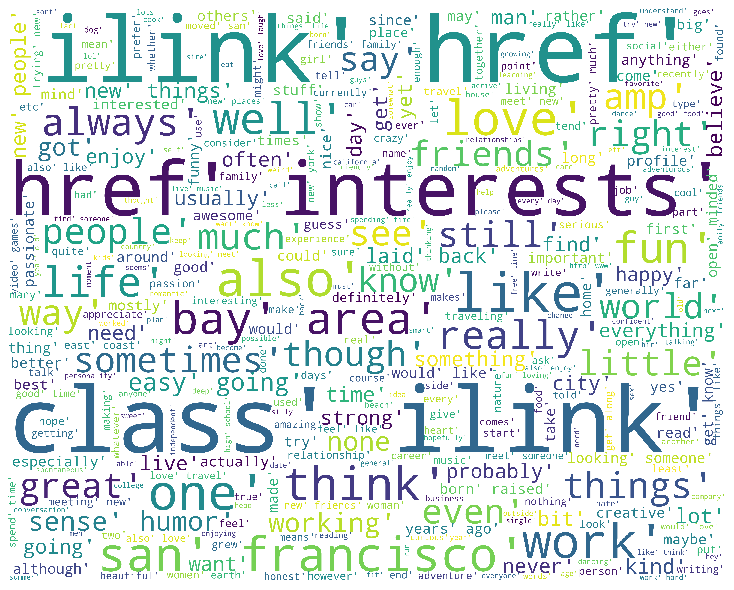

In [203]:
#Let's look at the male's wordcloud
common_words_m = '' 
# iterate through female token words 
for val in m_common: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    common_words_m += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1000, height = 800, 
                background_color ='white', 
                stopwords = stop, max_words=1000,scale=6,
                min_font_size = 10).generate(common_words_m)
plt.figure(figsize = (10, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

from above wordcloud, most of male are also come from San Franciso, they like to talk about friends,life and use fun,easy going , humor to describe themselves.

## check the most common  50 words after processing